In [100]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [101]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [102]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


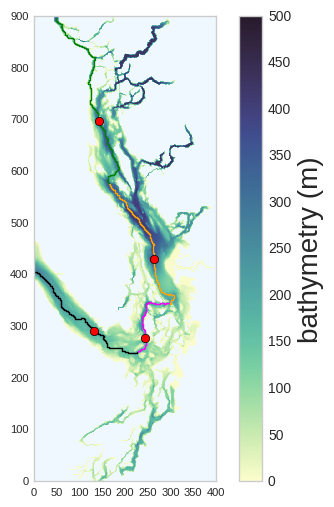

In [103]:
thalweg_file='/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

bath = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']
t_cmap = cm.cm.deep
# def one_panel_plot(surfdat_1, 'tit1',t_cmap,xsize,ysize,0,500,'bath','woo'):
#     "TESTED"

fig = plt.figure(figsize=(6,6))
nop = 1
for i in range(1,nop+1):

    if i == 1:
        ax = fig.add_subplot(1,nop,i)
        cmap = t_cmap
        tplt = np.ma.masked_values(bath1,0)
        ax.set_title('',fontsize = 20 )
        v_min = 0
        v_max = 500
        clabel = 'bathymetry (m)'

        viz_tools.set_aspect(ax)
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
        #       
        ax.plot(thalweg_pts[0:400, 1],thalweg_pts[0:400, 0],'k-')
        ax.plot(thalweg_pts[400:600, 1],thalweg_pts[400:600, 0],color='fuchsia',linestyle='-')
        ax.plot(thalweg_pts[600:1000, 1],thalweg_pts[600:1000, 0],color='orange',linestyle='-')
        ax.plot(thalweg_pts[1000:1533, 1],thalweg_pts[1000:1533, 0],color='green',linestyle='-')

        tpoints = [250,450,750,1200]
        for i in range(0,len(tpoints)):
            ttp = tpoints[i]
            ax.plot(thalweg_pts[ttp,1],thalweg_pts[ttp,0],marker = 'o',color = 'red')

        cbar = fig.colorbar(mesh, ax=ax)
        cbar.set_label(clabel, fontsize = 20 )
        cbar.ax.tick_params(labelsize=10)


        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        cmap.set_bad('aliceblue')

#

In [104]:
PI_hov = nc.Dataset('PI2015_2ndyr_hovmoller_to1229.nc')
BR_hov = nc.Dataset('BR2015_2ndyr_hovmoller_to1229.nc')
PI_dic = PI_hov['model_output']['dic_hovmol'][:]
BR_dic = BR_hov['model_output']['dic_hovmol'][:]
PI_ta = PI_hov['model_output']['ta_hovmol'][:]
BR_ta = BR_hov['model_output']['ta_hovmol'][:]
PI_sal = PI_hov['model_output']['sal_hovmol'][:]
BR_sal = BR_hov['model_output']['sal_hovmol'][:]
PI_temp = PI_hov['model_output']['temp_hovmol'][:]
BR_temp = BR_hov['model_output']['temp_hovmol'][:]

tpoints = [250,450,750,1200]
tregions = ['JdF', 'Haro', 'CS', 'NS']

BR_dic_s = np.swapaxes(BR_dic,0,1)
PI_dic_s = np.swapaxes(PI_dic,0,1)
BR_ta_s = np.swapaxes(BR_ta,0,1)
PI_ta_s = np.swapaxes(PI_ta,0,1)
BR_temp_s = np.swapaxes(BR_temp,0,1)
PI_temp_s = np.swapaxes(PI_temp,0,1)
BR_sal_s = np.swapaxes(BR_sal,0,1)
PI_sal_s = np.swapaxes(PI_sal,0,1)
np.shape(BR_dic_s)

(40, 363, 1533)

In [105]:
fwk = nc.Dataset('/data/tjarniko/results/RFPARTY/rfncs/SKOG_1d_20181213_20190101_ptrc_T_20190101-20190101.nc')
zlevels = (fwk['deptht'][:])

# print(zlevels)
# print(zlevels[0:20])
# print(zlevels[20:27])
# print(zlevels[27:40])

In [106]:
dimen_hovmol = np.shape(BR_dic_s)
days_len = dimen_hovmol[1]
d = zlevels
depth_broad = np.empty((40, days_len, 1533))
for b in range(0,days_len):
    for c in range(0,1533):
        depth_broad[:,b,c] = zlevels

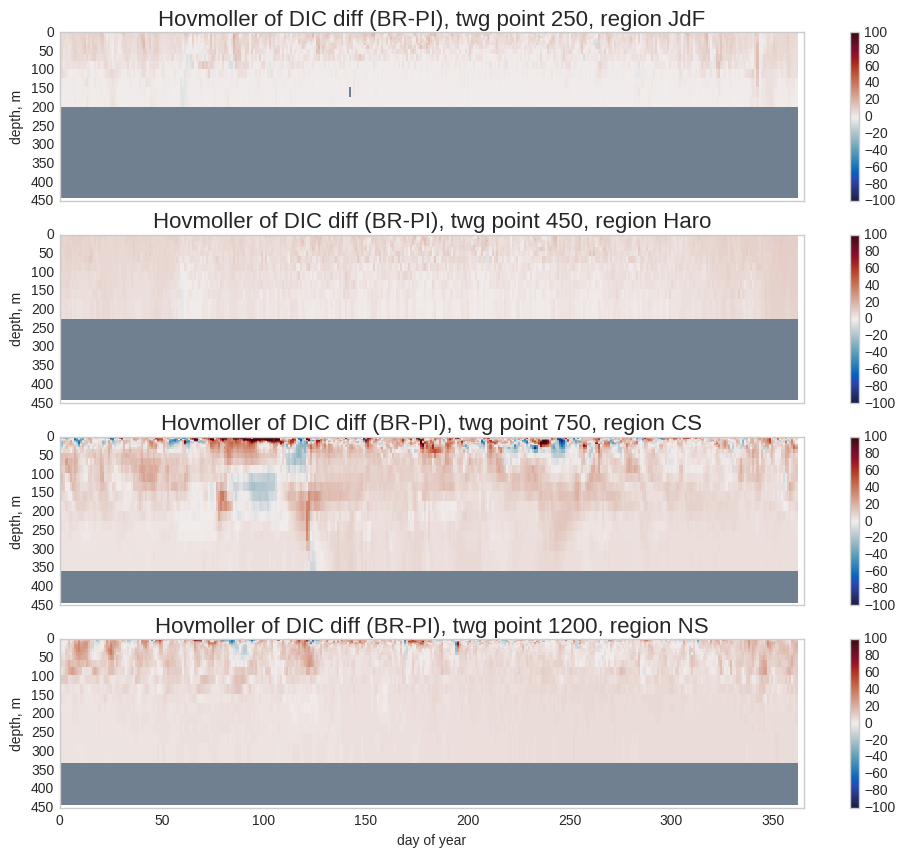

In [107]:
%matplotlib inline

###figures
fig = plt.figure(figsize=(12,10))

for i in range(1,5):
    tpoint = tpoints[i-1]
    tregion = tregions[i-1]
    ax = fig.add_subplot(4,1,i)
    sd = (BR_dic_s[:,:,tpoint] - PI_dic_s[:,:,tpoint])
    tplt = np.ma.masked_values(sd,0)
    t_cmap = cm.cm.balance
    tslice = np.arange(0,days_len,1)
    mesh = ax.pcolormesh(tslice, zlevels, tplt, cmap=t_cmap, vmin=-100, vmax=100)
    land_colour = 'slategrey'
    t_cmap.set_bad(land_colour)
    
    cbar = fig.colorbar(mesh, ax=ax)
    ax.set_xlim([0,365])
    ax.invert_yaxis()
    ax.set_ylabel('depth, m')
    if i != 4:
        ax.set_xticklabels([])
    if i == 4:
        ax.set_xlabel('day of year')
        
    ax.set_title('Hovmoller of DIC diff (BR-PI), twg point ' + str(tpoint) +', region ' +tregion, fontsize = 16)


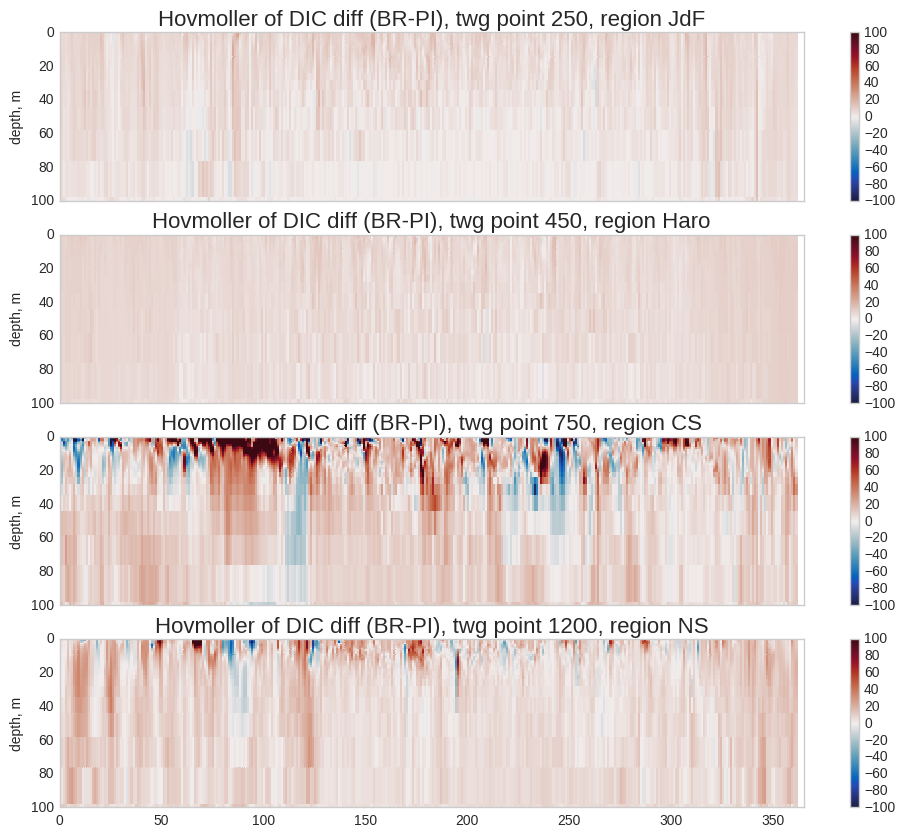

In [108]:
%matplotlib inline

###figures
fig = plt.figure(figsize=(12,10))

for i in range(1,5):
    tpoint = tpoints[i-1]
    tregion = tregions[i-1]
    ax = fig.add_subplot(4,1,i)
    sd = (BR_dic_s[:,:,tpoint] - PI_dic_s[:,:,tpoint])
    tplt = np.ma.masked_values(sd,0)
    t_cmap = cm.cm.balance
    tslice = np.arange(0,days_len,1)
    mesh = ax.pcolormesh(tslice, zlevels, tplt, cmap=t_cmap, vmin=-100, vmax=100)
    land_colour = 'slategrey'
    t_cmap.set_bad(land_colour)
    ax.set_ylabel('depth, m')
    cbar = fig.colorbar(mesh, ax=ax)
    ax.set_xlim([0,365])
    ax.set_ylim([0,100])
    ax.invert_yaxis()
    if i != 4:
        ax.set_xticklabels([])
    ax.set_title('Hovmoller of DIC diff (BR-PI), twg point ' + str(tpoint) +', region ' +tregion, fontsize = 16)


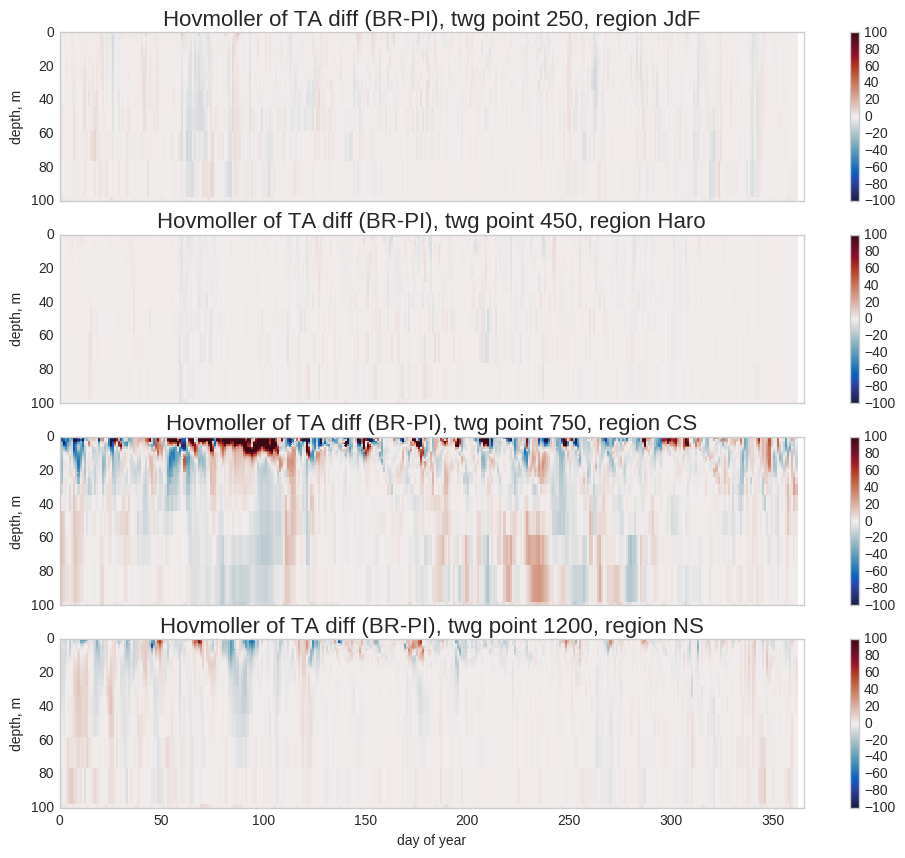

In [109]:
%matplotlib inline

###figures
fig = plt.figure(figsize=(12,10))

for i in range(1,5):
    tpoint = tpoints[i-1]
    tregion = tregions[i-1]
    ax = fig.add_subplot(4,1,i)
    sd = (BR_ta_s[:,:,tpoint] - PI_ta_s[:,:,tpoint])
    tplt = np.ma.masked_values(sd,0)
    t_cmap = cm.cm.balance
    tslice = np.arange(0,days_len,1)
    mesh = ax.pcolormesh(tslice, zlevels, tplt, cmap=t_cmap, vmin=-100, vmax=100)
    land_colour = 'slategrey'
    t_cmap.set_bad(land_colour)
    ax.set_ylabel('depth, m')
    cbar = fig.colorbar(mesh, ax=ax)
    ax.set_xlim([0,365])
    ax.set_ylim([0,100])
    ax.invert_yaxis()
    if i != 4:
        ax.set_xticklabels([])
    if i == 4:
        ax.set_xlabel('day of year')
    ax.set_title('Hovmoller of TA diff (BR-PI), twg point ' + str(tpoint) +', region ' +tregion, fontsize = 16)


In [110]:
def oned_moxy(tsal, ttemp, tdic, tta, pres_atm, depth_this):

    size_box = np.shape(tdic)
    size_0 = size_box[0]
    size_1= size_box[1]
    size_2 = size_box[2]

    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    #tdepth = np.zeros_like(tsra)
    tpressure[:] = pres_atm
    tdepth = np.ravel(depth_this)
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(size_0,size_1,size_2)
    OmAr = OmegaA.reshape(size_0,size_1,size_2)
    pco2r = pco2.reshape(size_0,size_1,size_2)
    
    return pHr, OmAr, pco2r

In [ ]:
BR_pH, BR_OmA, BR_pco2 = oned_moxy(BR_sal_s, BR_temp_s, BR_dic_s, BR_ta_s, 1, depth_broad)

In [ ]:
PI_pH, PI_OmA, PI_pco2 = oned_moxy(PI_sal_s, PI_temp_s, PI_dic_s, PI_ta_s, 1, depth_broad)

In [ ]:
%matplotlib inline

###figures
fig = plt.figure(figsize=(12,10))

for i in range(1,5):
    tpoint = tpoints[i-1]
    tregion = tregions[i-1]
    ax = fig.add_subplot(4,1,i)
    sd = (BR_OmA[:,:,tpoint] - PI_OmA[:,:,tpoint])
    tplt = np.ma.masked_values(sd,0)
    t_cmap = cm.cm.balance
    tslice = np.arange(0,days_len,1)
    mesh = ax.pcolormesh(tslice, zlevels, tplt, cmap=t_cmap, vmin=-0.4, vmax=0.4)
    land_colour = 'slategrey'
    t_cmap.set_bad(land_colour)
    ax.set_ylabel('depth, m')
    cbar = fig.colorbar(mesh, ax=ax)
    ax.set_xlim([0,365])
    ax.invert_yaxis()
    if i != 4:
        ax.set_xticklabels([])
    if i == 4:
        ax.set_xlabel('day of year')
    ax.set_title('Hovmoller of OmA diff (BR-PI), twg point ' + str(tpoint) +', region ' +tregion, fontsize = 16)


In [ ]:
%matplotlib inline

###figures
fig = plt.figure(figsize=(12,10))

for i in range(1,5):
    tpoint = tpoints[i-1]
    tregion = tregions[i-1]
    ax = fig.add_subplot(4,1,i)
    sd = (BR_pH[:,:,tpoint] - PI_pH[:,:,tpoint])
    tplt = np.ma.masked_values(sd,0)
    t_cmap = cm.cm.balance
    tslice = np.arange(0,days_len,1)
    mesh = ax.pcolormesh(tslice, zlevels, tplt, cmap=t_cmap, vmin=-0.2, vmax=0.2)
    land_colour = 'slategrey'
    t_cmap.set_bad(land_colour)
    ax.set_ylabel('depth, m')
    cbar = fig.colorbar(mesh, ax=ax)
    ax.set_xlim([0,365])
    ax.invert_yaxis()
    if i != 4:
        ax.set_xticklabels([])
    if i == 4:
        ax.set_xlabel('day of year')
    ax.set_title('Hovmoller of pH diff (BR-PI), twg point ' + str(tpoint) +', region ' +tregion, fontsize = 16)
